# **Autoencoders in Machine Learning**  

## Introduction  
At the heart of deep learning lies the neural network, an intricate system of nodes mimicking the human brain’s architecture. Neural networks excel at discerning complex patterns in vast datasets, enabling predictions, classification, and generating insights.  

Autoencoders, a fascinating subset of neural networks, offer a unique approach to **unsupervised learning**. They can learn effective representations of data and are widely used in fields like **image processing** and **anomaly detection**.  

---

## What Are Autoencoders?  
Autoencoders are a class of **unsupervised learning** algorithms designed to learn efficient representations of input data without labels.  

### Key Components:  
1. **Encoder**:  
   - Transforms input data into a reduced-dimensional representation (latent space/encoding).  
2. **Decoder**:  
   - Rebuilds the original input from the reduced-dimensional representation.

### Goal:  
To compress input data and then reconstruct it as accurately as possible. The encoder-decoder process helps the network capture meaningful patterns and essential features of the data.  

---

## Architecture of Autoencoders  

### General Structure:  
1. **Encoder**:  
   - The input layer takes raw data.  
   - Hidden layers reduce dimensionality to capture key patterns.  
   - Bottleneck layer (latent space): Final hidden layer where data is significantly compressed.  

2. **Decoder**:  
   - Expands the latent representation back to the original dimensionality.  
   - Reconstructs the input through progressively increasing layers.  
   - The output layer produces the reconstructed data.  

---

### Loss Function:  
- **Reconstruction Loss**: Measures the difference between the input and the reconstructed output.  
  - Common choices:  
    - **Mean Squared Error (MSE)** for continuous data.  
    - **Binary Cross-Entropy** for binary data.  
- Autoencoders learn by minimizing this reconstruction loss.  

### Techniques to Constrain the Network:  
1. **Small Hidden Layers**: Forces the network to pick representative features.  
2. **Regularization**: Adds loss terms encouraging meaningful training.  
3. **Denoising**: Trains the network to remove noise from data.  
4. **Activation Functions**: Activates only a subset of nodes, reducing redundancy.  

---

## Types of Autoencoders  

### 1. Denoising Autoencoder  
**Purpose**: Works on partially corrupted input to recover the undistorted version.  
- **Advantages**:  
  - Extracts meaningful features while reducing noise.  
  - Can be used for data augmentation.  
- **Disadvantages**:  
  - Challenging to select the right type/level of noise.  
  - Risk of losing critical information.  

---

### 2. Sparse Autoencoder  
**Purpose**: Contains more hidden units than input but enforces sparsity by activating only a few units.  
- **Advantages**:  
  - Filters noise and irrelevant features.  
  - Learns meaningful patterns.  
- **Disadvantages**:  
  - Hyperparameter tuning is crucial.  
  - Increased computational complexity.  

---

### 3. Variational Autoencoder (VAE)  
**Purpose**: Makes assumptions about the distribution of latent variables.  
- **Advantages**:  
  - Generates new data points resembling training data.  
  - Useful for anomaly detection and data exploration.  
- **Disadvantages**:  
  - Approximation errors can affect sample quality.  
  - Limited diversity in generated samples.  

---

### 4. Convolutional Autoencoder  
**Purpose**: Uses convolutional layers for image data.  
- **Advantages**:  
  - Compresses high-dimensional image data.  
  - Can reconstruct missing parts of images.  
- **Disadvantages**:  
  - Prone to overfitting.  
  - Compression can lead to data loss and lower-quality reconstructions.  

---

## Implementation of Autoencoders  

### Steps:  
1. **Import Libraries**: Use Python libraries like `matplotlib`, `numpy`, `pandas`, `sklearn`, and `keras`.  
2. **Define Encoder and Decoder**:  
   - Encoder reduces the input to a lower-dimensional latent space.  
   - Decoder reconstructs the input using the latent space.  
3. **Train the Autoencoder**: Minimize reconstruction loss using a dataset.  
4. **Evaluate Performance**: Compare the input and reconstructed output.  

---

```

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from keras import layers, losses
from keras.datasets import mnist
from keras.models import Model


In [2]:
# Loading the MNIST dataset and extracting training and testing data
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizing pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Displaying the shapes of the training and testing datasets
print("Shape of the training data:", x_train.shape)
print("Shape of the testing data:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of the training data: (60000, 28, 28)
Shape of the testing data: (10000, 28, 28)


In [7]:
# Definition of the Autoencoder model as a subclass of the TensorFlow Model class

class SimpleAutoencoder(Model):
	def __init__(self,latent_dimensions , data_shape):
		super(SimpleAutoencoder, self).__init__()
		self.latent_dimensions = latent_dimensions
		self.data_shape = data_shape

		# Encoder architecture using a Sequential model
		self.encoder = tf.keras.Sequential([
			layers.Flatten(),
			layers.Dense(latent_dimensions, activation='relu'),
		])

		# Decoder architecture using another Sequential model
		# Calculate the product of data_shape dimensions using np.prod to get the total number of pixels
		num_pixels = np.prod(data_shape)
		self.decoder = tf.keras.Sequential([
			# Use num_pixels as the number of neurons in the Dense layer
			layers.Dense(num_pixels, activation='sigmoid'),
			layers.Reshape(data_shape)
		])

	# Forward pass method defining the encoding and decoding steps
	def call(self, input_data):
		encoded_data = self.encoder(input_data)
		decoded_data = self.decoder(encoded_data)
		return decoded_data

# Extracting shape information from the testing dataset
input_data_shape = x_test.shape[1:]

# Specifying the dimensionality of the latent space
latent_dimensions = 64

# Creating an instance of the SimpleAutoencoder model
simple_autoencoder = SimpleAutoencoder(latent_dimensions, input_data_shape)


### Detailed Explanation of the Autoencoder Model Code

1. **Defining the Autoencoder Class:**  
   ```python
   class SimpleAutoencoder(Model):
   ```  
   - We define a new class `SimpleAutoencoder` that inherits from TensorFlow's `Model` class. This allows us to encapsulate the autoencoder's layers and forward pass in a single, reusable model.

2. **Initialization Method (`__init__`):**  
   ```python
   def __init__(self, latent_dimensions, data_shape):
       super(SimpleAutoencoder, self).__init__()
       self.latent_dimensions = latent_dimensions
       self.data_shape = data_shape
   ```  
   - The constructor (`__init__`) accepts two parameters:
     - `latent_dimensions`: The size of the latent space (i.e., the number of neurons in the bottleneck layer).
     - `data_shape`: The shape of the input data (for example, for MNIST images this might be `(28, 28)`).
   - `super(SimpleAutoencoder, self).__init__()` initializes the base class, ensuring that the model is properly set up.

3. **Building the Encoder:**  
   ```python
   self.encoder = tf.keras.Sequential([
       layers.Flatten(),
       layers.Dense(latent_dimensions, activation='relu'),
   ])
   ```  
   - The encoder is defined as a `Sequential` model containing two layers:
     - **Flatten Layer:** Converts the multi-dimensional input (e.g., 28×28 pixels) into a one-dimensional vector.
     - **Dense Layer:** Maps the flattened vector to a lower-dimensional latent space with `latent_dimensions` neurons. The `'relu'` activation introduces non-linearity and helps the model learn complex patterns.

4. **Building the Decoder:**  
   ```python
   num_pixels = np.prod(data_shape)
   self.decoder = tf.keras.Sequential([
       layers.Dense(num_pixels, activation='sigmoid'),
       layers.Reshape(data_shape)
   ])
   ```  
   - **Calculating `num_pixels`:**  
     - `np.prod(data_shape)` computes the total number of pixels in the input (e.g., for a 28×28 image, `28 * 28 = 784`).
   - The decoder is also a `Sequential` model and consists of:
     - **Dense Layer:** Transforms the latent representation back to a vector of length equal to the total number of pixels. The `'sigmoid'` activation is used to produce outputs in the range [0, 1], matching the normalized pixel values.
     - **Reshape Layer:** Reshapes the output vector back into the original data shape (e.g., (28, 28)), reconstructing the image.

5. **Defining the Forward Pass (`call` Method):**  
   ```python
   def call(self, input_data):
       encoded_data = self.encoder(input_data)
       decoded_data = self.decoder(encoded_data)
       return decoded_data
   ```  
   - The `call` method defines the forward pass of the autoencoder:
     - **Encoding:** The input data is passed through the encoder to obtain the latent representation (`encoded_data`).
     - **Decoding:** This latent representation is then passed through the decoder to reconstruct the original input (`decoded_data`).
     - **Output:** The reconstructed data is returned.

6. **Creating an Instance of the Model:**  
   ```python
   input_data_shape = x_test.shape[1:]
   latent_dimensions = 64
   simple_autoencoder = SimpleAutoencoder(latent_dimensions, input_data_shape)
   ```  
   - **Extracting Input Shape:**  
     - `x_test.shape[1:]` obtains the shape of a single test sample (e.g., `(28, 28)` if using MNIST). This is stored in `input_data_shape`.
   - **Specifying Latent Dimensions:**  
     - We set the latent space dimensionality to 64.
   - **Instantiating the Autoencoder:**  
     - Finally, an instance of `SimpleAutoencoder` is created with the specified latent dimensions and input shape.


In [8]:
simple_autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

simple_autoencoder.fit(x_train, x_train,
				epochs=1,
				shuffle=True,
				validation_data=(x_test, x_test))


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0434 - val_loss: 0.0092


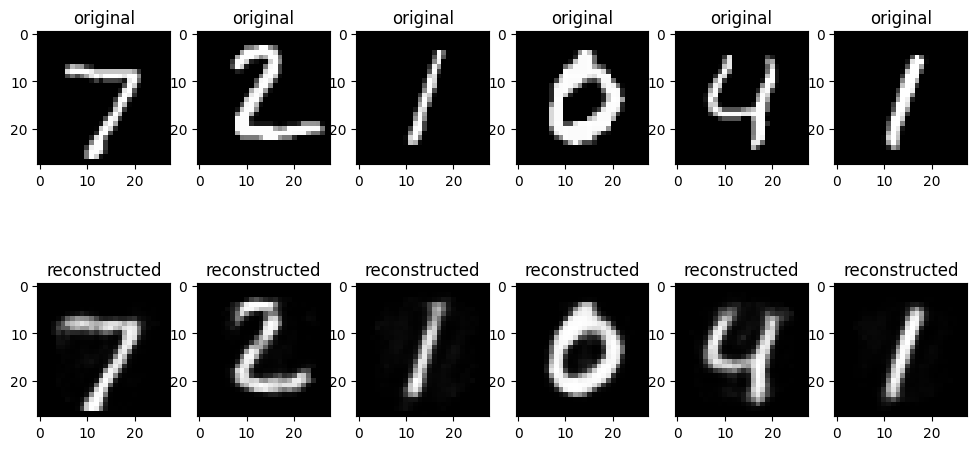

In [12]:
encoded_imgs = simple_autoencoder.encoder(x_test).numpy()
decoded_imgs = simple_autoencoder.decoder(encoded_imgs).numpy()

n = 6
plt.figure(figsize=(12, 6))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()

# display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()

plt.show()


### Visualizing the Autoencoder's Reconstruction Performance

In this section, we visualize the performance of our autoencoder by comparing the original images with their reconstructed counterparts. The code performs the following steps:

1. **Encoding and Decoding the Test Data:**
   - **Encoding:**  
     ```python
     encoded_imgs = simple_autoencoder.encoder(x_test).numpy()
     ```
     - We pass the test dataset `x_test` through the autoencoder's encoder to obtain the latent representations (`encoded_imgs`).
     - The `.numpy()` method is used to convert the resulting TensorFlow tensor into a NumPy array for easier processing and visualization.

   - **Decoding:**  
     ```python
     decoded_imgs = simple_autoencoder.decoder(encoded_imgs).numpy()
     ```
     - The latent representations are then passed through the decoder to reconstruct the images (`decoded_imgs`).
     - Again, `.numpy()` converts the output tensor into a NumPy array.

2. **Setting Up the Plot:**
   - **Figure Configuration:**  
     ```python
     n = 6
     plt.figure(figsize=(12, 6))
     ```
     - We define `n = 6` to visualize 6 images from the test set.
     - The figure size is set to `(12, 6)` inches to provide sufficient space for displaying the images.

3. **Plotting the Original and Reconstructed Images:**
   - **Loop Through Images:**  
     ```python
     for i in range(n):
       ax = plt.subplot(2, n, i + 1)
       plt.imshow(x_test[i])
       plt.title("original")
       plt.gray()
     ```
     - A loop iterates over the first 6 images.
     - For each image:
       - A subplot is created in a 2-row grid with `n` columns. The first row is reserved for the original images.
       - `plt.imshow(x_test[i])` displays the original image.
       - `plt.title("original")` sets the title above the image.
       - `plt.gray()` applies a grayscale colormap to match the original MNIST image style.

   - **Plotting Reconstructed Images:**  
     ```python
       ax = plt.subplot(2, n, i + 1 + n)
       plt.imshow(decoded_imgs[i])
       plt.title("reconstructed")
       plt.gray()
     ```
     - In the same loop, a second subplot is created for each image in the second row.
     - This subplot displays the corresponding reconstructed image from `decoded_imgs`.
     - `plt.title("reconstructed")` sets the title for the reconstructed image.
     - Again, `plt.gray()` ensures the image is displayed in grayscale.

4. **Displaying the Plot:**
   - ```python
     plt.show()
     ```
     - Finally, `plt.show()` renders the entire figure containing both the original and reconstructed images, allowing us to visually assess how well the autoencoder is reconstructing the input data.

Overall, this code snippet allows us to compare the autoencoder’s output with the original images side by side, providing a clear visual indication of the reconstruction quality. Differences between the original and reconstructed images can highlight areas where the model may need improvement.


## Conclusion

In this notebook, we explored the design, implementation, and evaluation of a simple autoencoder using TensorFlow. Here are the key takeaways:

- **Model Architecture:**  
  We defined an autoencoder by subclassing TensorFlow’s `Model` class, splitting the network into two main parts:  
  - An **encoder** that compresses the input data (MNIST images) into a lower-dimensional latent space.
  - A **decoder** that reconstructs the original input from the latent representation.  
  This architecture illustrates the fundamental idea behind autoencoders: learning an efficient, compressed representation of the input data while being able to accurately reconstruct it.

- **Data Preprocessing:**  
  The MNIST dataset was loaded and preprocessed by normalizing the pixel values to the [0, 1] range. Normalization is essential to improve training convergence and overall model performance.

- **Training and Evaluation:**  
  We trained the autoencoder and then used it to encode and decode the test images. The visualization of original versus reconstructed images provided a clear, side-by-side comparison of the autoencoder’s performance. This allowed us to visually inspect the quality of the reconstructions and assess how well the model captured the underlying structure of the data.

- **Insights and Future Work:**  
  - The autoencoder successfully learned a compressed representation of the MNIST digits, demonstrating its ability to capture the key features of the input data.
  - Minor discrepancies between the original and reconstructed images can point to potential areas for further tuning—such as adjusting the latent space size, refining the network architecture, or modifying the activation functions and loss function.
  - This foundational work paves the way for more advanced applications, including anomaly detection, denoising, and even generating new data samples.

